In [ ]:
# === Imports ===
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import xgboost as xgb
import lightgbm as lgb

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, classification_report,
    confusion_matrix, ConfusionMatrixDisplay
)

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

In [ ]:
# === Data Loading ===
from google.colab import files
uploaded = files.upload()





Saving cleaned_heart_disease.csv to cleaned_heart_disease.csv


In [ ]:
df = pd.read_csv('cleaned_heart_disease.csv')

In [ ]:
df.head()
df.tail()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,1
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,1
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,NaN,3.0,0


In [ ]:

# === Data Cleaning & Exploration ===
df.replace('?', np.nan, inplace=True)
df['ca'] = pd.to_numeric(df['ca'], errors='coerce')
df['thal'] = pd.to_numeric(df['thal'], errors='coerce')




In [ ]:
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'num', 'ca']
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']

# Print descriptive statistics (optional)
print("Numerical features description:")
df[numerical_features].describe()



Numerical features description:


,age,trestbps,chol,thalach,oldpeak,num,ca
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000
mean,54.438944,131.689769,246.693069,149.607261,1.039604,0.937294,0.672241
std,9.038662,17.599748,51.776918,22.875003,1.161075,1.228536,0.937438
min,29.000000,94.000000,126.000000,71.000000,0.000000,0.000000,0.000000
25%,48.000000,120.000000,211.000000,133.500000,0.000000,0.000000,0.000000
50%,56.000000,130.000000,241.000000,153.000000,0.800000,0.000000,0.000000
75%,61.000000,140.000000,275.000000,166.000000,1.600000,2.000000,1.000000
max,77.000000,200.000000,564.000000,202.000000,6.200000,4.000000,3.000000


In [ ]:
print("\nCategorical features description:")
df[categorical_features].describe()


Categorical features description:


,sex,cp,fbs,restecg,exang,slope,thal
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,301.000000
mean,0.679868,3.158416,0.148515,0.990099,0.326733,1.600660,4.734219
std,0.467299,0.960126,0.356198,0.994971,0.469794,0.616226,1.939706
min,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,3.000000
25%,0.000000,3.000000,0.000000,0.000000,0.000000,1.000000,3.000000
50%,1.000000,3.000000,0.000000,1.000000,0.000000,2.000000,3.000000
75%,1.000000,4.000000,0.000000,2.000000,1.000000,2.000000,7.000000
max,1.000000,4.000000,1.000000,2.000000,1.000000,3.000000,7.000000


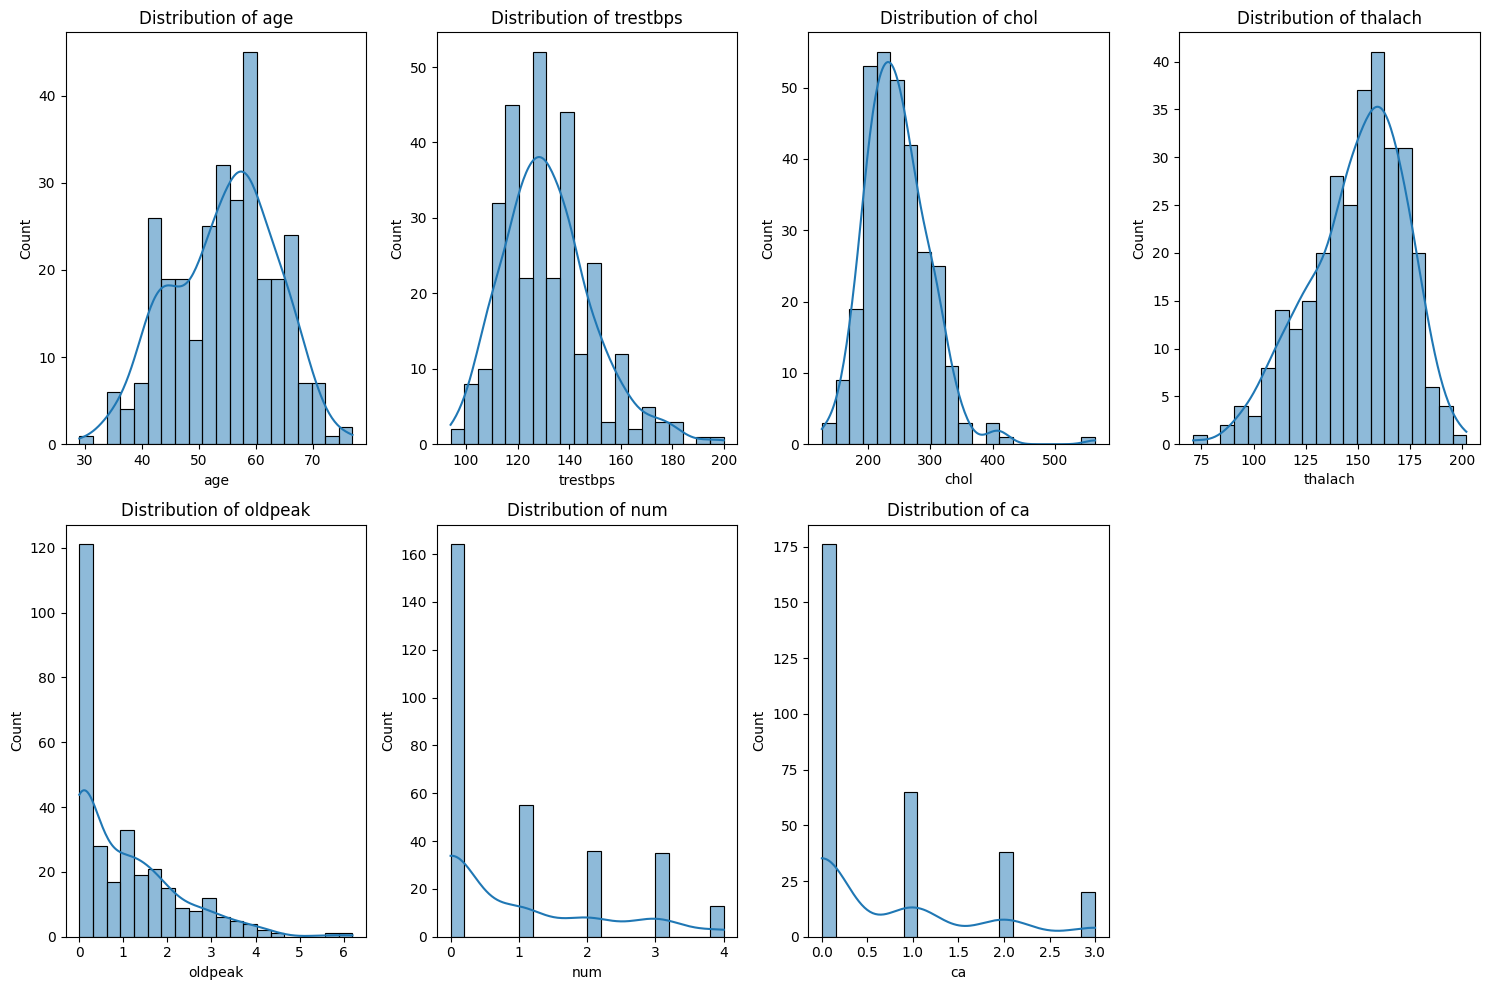

In [ ]:
# Histograms for numerical features
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 4, i)
    sns.histplot(df[feature].dropna(), kde=True, bins=20)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()


/tmp/ipython-input-12-2659416966.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, palette='Set2')
/tmp/ipython-input-12-2659416966.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, palette='Set2')
/tmp/ipython-input-12-2659416966.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, palette='Set2')
/tmp/ipython-input-12-2659416966.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` a

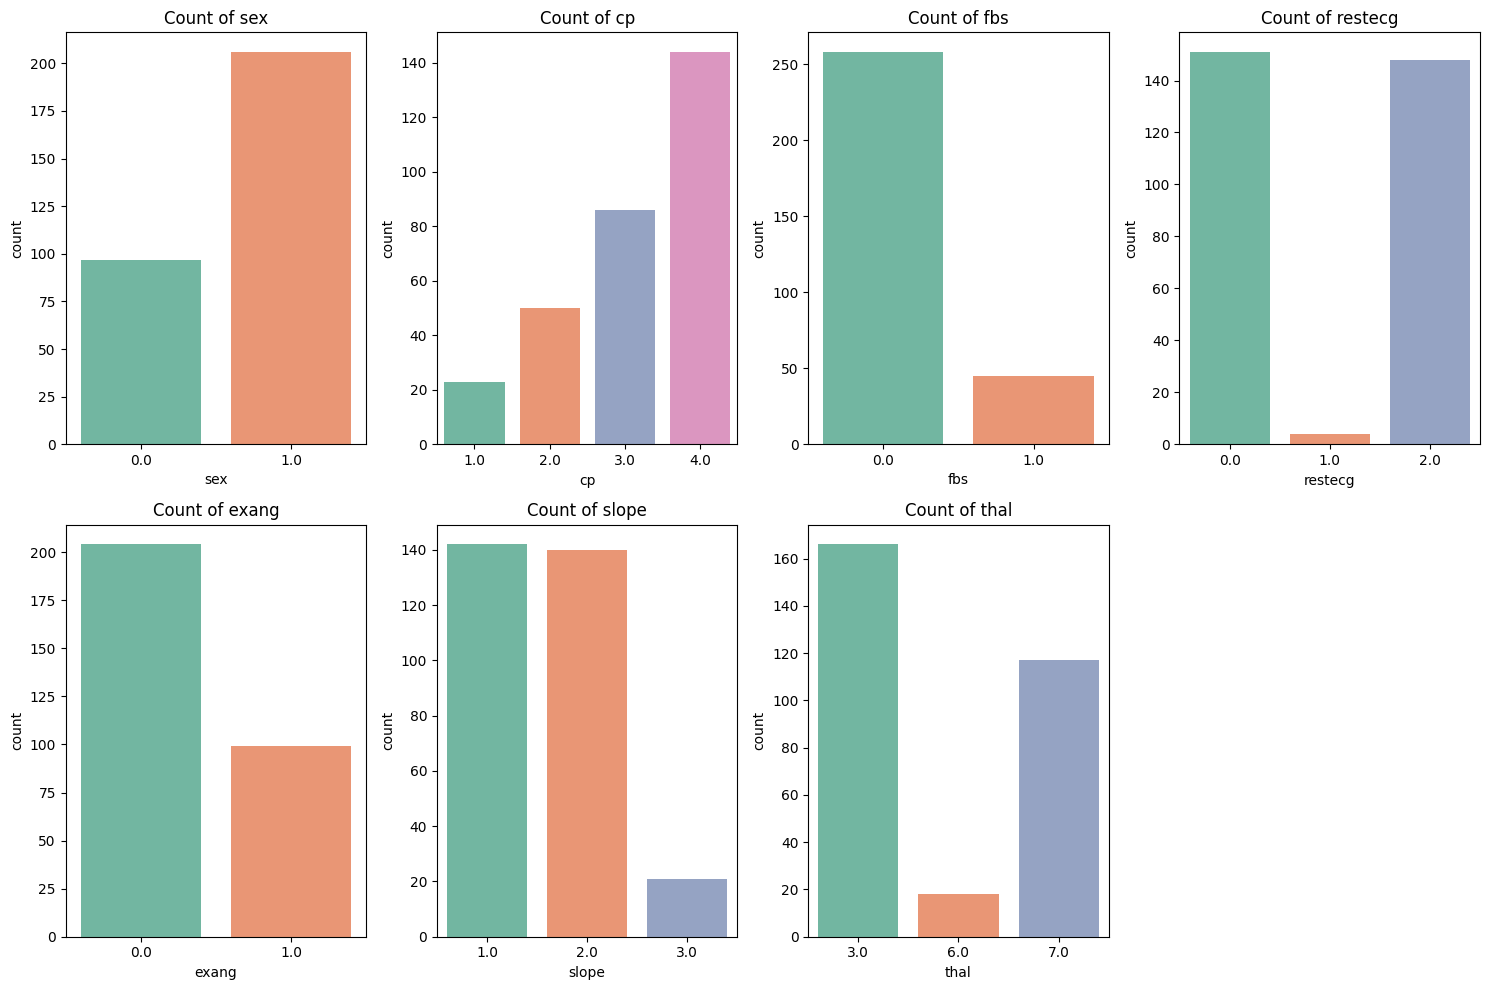

In [ ]:
# Countplots for categorical features
plt.figure(figsize=(15, 10))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(2, 4, i)
    sns.countplot(data=df, x=feature, palette='Set2')
    plt.title(f'Count of {feature}')
plt.tight_layout()
plt.show()


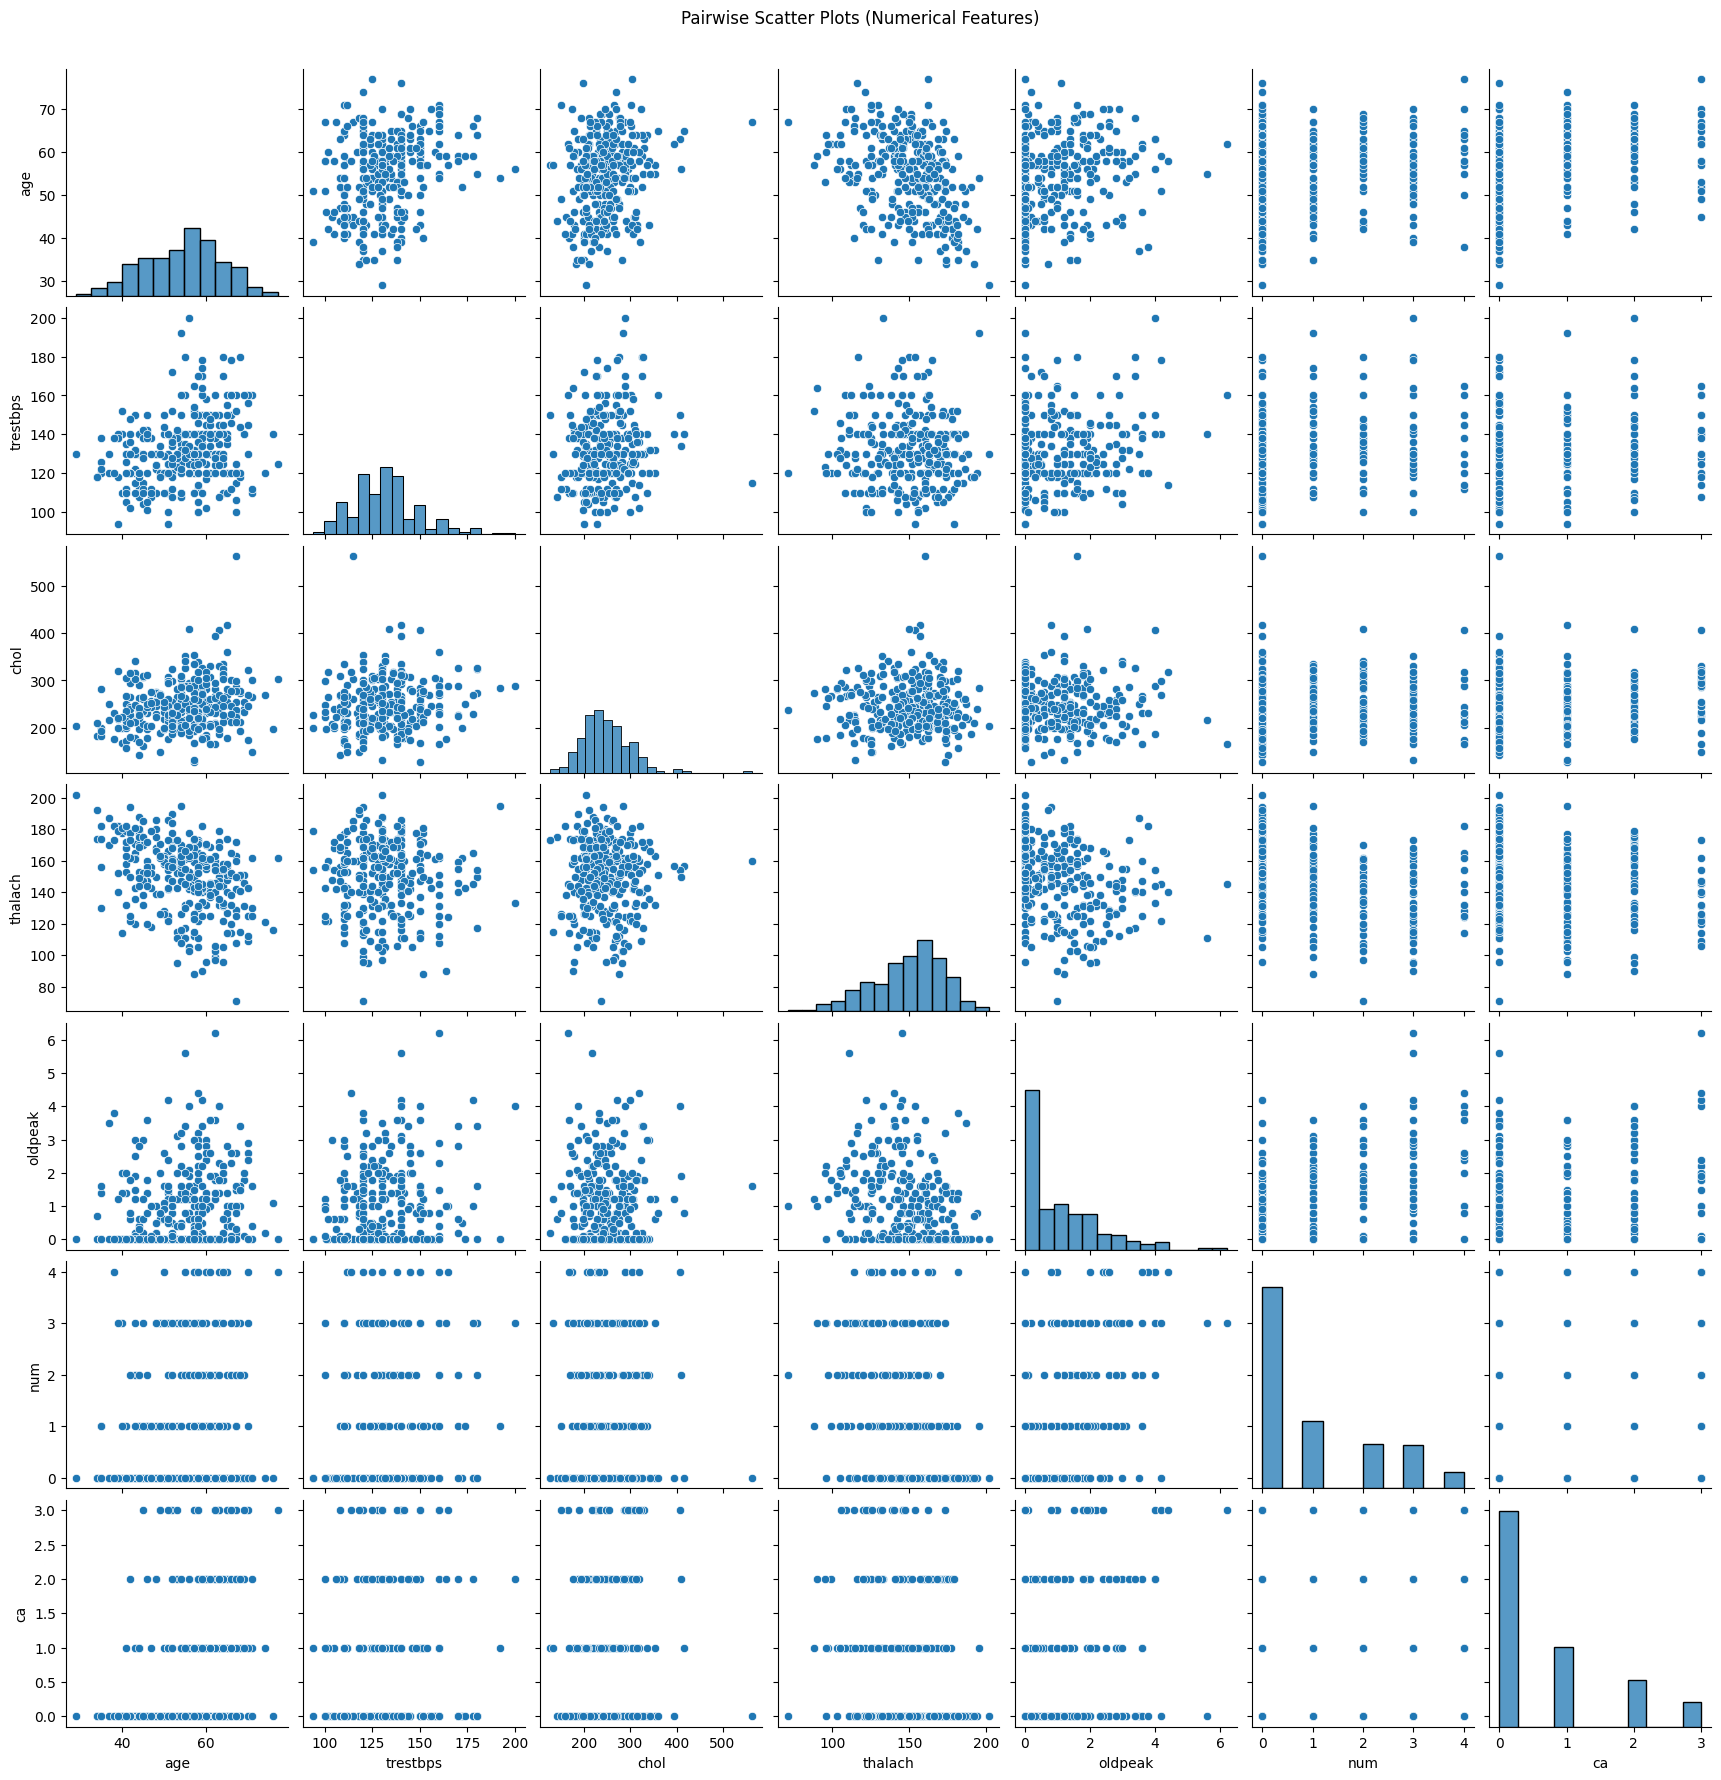

In [ ]:
sns.pairplot(df[numerical_features])
plt.suptitle("Pairwise Scatter Plots (Numerical Features)", y=1.02)
plt.show()

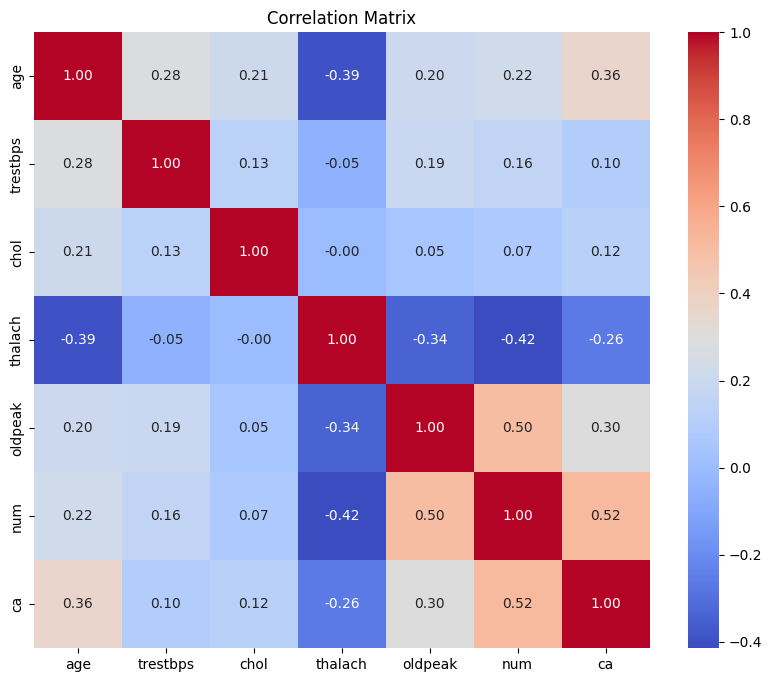

In [ ]:
# Correlation matrix for numerical features
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_features].corr(), annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title("Correlation Matrix")
plt.show()

Target variable distribution before binarization:
num
0    164
1     55
2     36
3     35
4     13
Name: count, dtype: int64


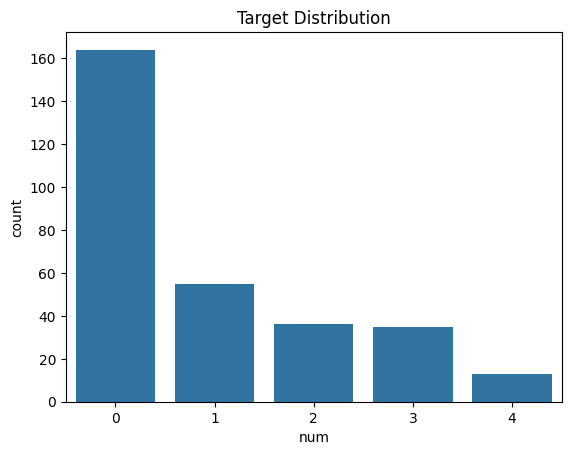

In [ ]:
# Target distribution
print("Target variable distribution before binarization:")
print(df['num'].value_counts())
sns.countplot(x='num', data=df)
plt.title("Target Distribution")
plt.show()

Target distribution after binarization:
num
0    164
1    139
Name: count, dtype: int64


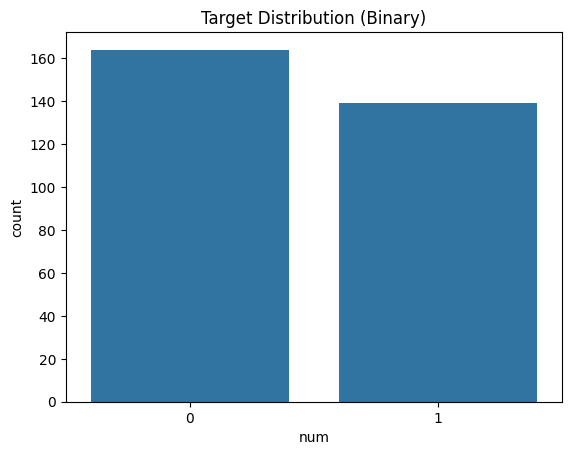

In [ ]:
# Binarize target (0 = no disease, 1 = disease)
df['num'] = df['num'].apply(lambda x: 0 if x == 0 else 1)
print("Target distribution after binarization:")
print(df['num'].value_counts())
sns.countplot(x='num', data=df)
plt.title("Target Distribution (Binary)")
plt.show()

In [ ]:
# === Data Preprocessing and Splitting ===
X = df.drop(columns='num')
y = df['num']



In [ ]:
# Identify columns by type
numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']

print(numerical_cols)
print(categorical_cols)

['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']
['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']


In [ ]:
# Build preprocessing pipelines
numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', numeric_transformer, numerical_cols),
    ('cat', categorical_transformer, categorical_cols)
])

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:

# Fit and transform training data, transform test data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)


Training Logistic Regression...
Best params: {'C': 0.1}
              precision    recall  f1-score   support

           0       0.93      0.82      0.87        33
           1       0.81      0.93      0.87        28

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.88      0.87      0.87        61

AUC-ROC: 0.9610


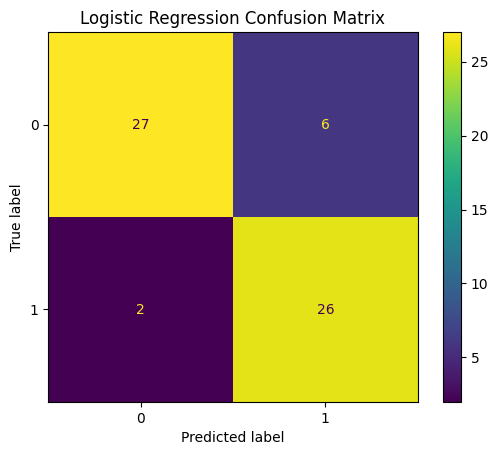


Training KNN...
Best params: {'n_neighbors': 5}
              precision    recall  f1-score   support

           0       0.93      0.85      0.89        33
           1       0.84      0.93      0.88        28

    accuracy                           0.89        61
   macro avg       0.89      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61

AUC-ROC: 0.9481


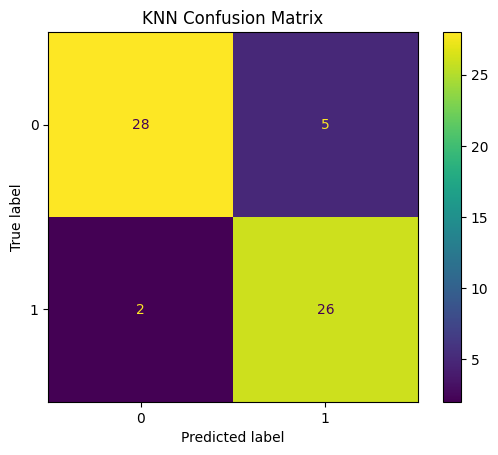


Training SVM...
Best params: {'C': 1, 'gamma': 'auto'}
              precision    recall  f1-score   support

           0       0.93      0.85      0.89        33
           1       0.84      0.93      0.88        28

    accuracy                           0.89        61
   macro avg       0.89      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61

AUC-ROC: 0.9535


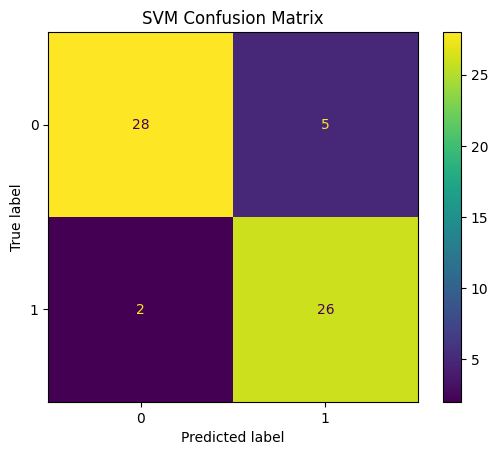


Training XGBoost...
Best params: {'learning_rate': 0.01, 'max_depth': 5}
              precision    recall  f1-score   support

           0       0.90      0.79      0.84        33
           1       0.78      0.89      0.83        28

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61

AUC-ROC: 0.8939


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:39:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


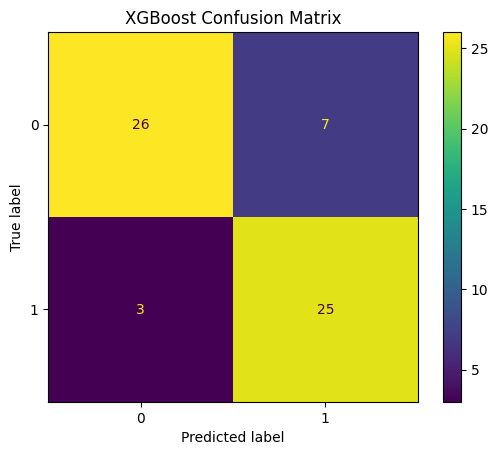


Training LightGBM...
[LightGBM] [Info] Number of positive: 111, number of negative: 131
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000078 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 251
[LightGBM] [Info] Number of data points in the train set: 242, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.458678 -> initscore=-0.165667
[LightGBM] [Info] Start training from score -0.165667
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


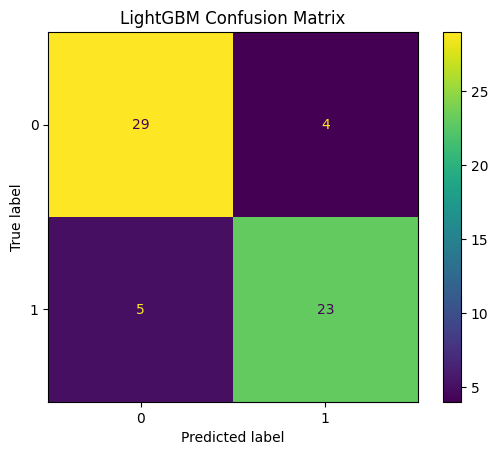

In [ ]:
# === Model Training and Evaluation ===
models = {
    "Logistic Regression": (
        LogisticRegression(max_iter=1000),
        {"C": [0.01, 0.1, 1, 10]}
    ),
    "KNN": (
        KNeighborsClassifier(),
        {"n_neighbors": [3, 5, 7, 9]}
    ),
    "SVM": (
        SVC(probability=True),
        {"C": [0.1, 1, 10], "gamma": ["scale", "auto"]}
    ),
    "XGBoost": (
        xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
        {"max_depth": [3, 5, 7], "learning_rate": [0.01, 0.1]}
    ),
    "LightGBM": (
        lgb.LGBMClassifier(),
        {"max_depth": [3, 5, 7], "learning_rate": [0.01, 0.1]}
    )
}

results = {}

for name, (model, param_grid) in models.items():
    print(f"\nTraining {name}...")
    grid = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid.fit(X_train_processed, y_train)
    best_model = grid.best_estimator_

    y_pred = best_model.predict(X_test_processed)
    try:
        y_proba = best_model.predict_proba(X_test_processed)[:, 1]
        auc = roc_auc_score(y_test, y_proba)
    except AttributeError:
        auc = None

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"Best params: {grid.best_params_}")
    print(classification_report(y_test, y_pred))
    if auc is not None:
        print(f"AUC-ROC: {auc:.4f}")

    cm = confusion_matrix(y_test, y_pred)
    ConfusionMatrixDisplay(cm).plot()
    plt.title(f"{name} Confusion Matrix")
    plt.show()

    results[name] = [acc, prec, rec, f1, auc]

In [ ]:
# === MLP Neural Network ===
# Convert sparse matrix to dense if needed
X_train_tensor = torch.tensor(
    X_train_processed.toarray() if hasattr(X_train_processed, 'toarray') else X_train_processed,
    dtype=torch.float32
)
X_test_tensor = torch.tensor(
    X_test_processed.toarray() if hasattr(X_test_processed, 'toarray') else X_test_processed,
    dtype=torch.float32
)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

class MLP(nn.Module):
    def __init__(self, input_dim):
        super(MLP, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)

model = MLP(X_train_tensor.shape[1])
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

epochs = 20
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch).squeeze()
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch {epoch+1}/{epochs}, Loss: {running_loss:.4f}")

Epoch 1/20, Loss: 5.4368
Epoch 2/20, Loss: 5.2106
Epoch 3/20, Loss: 4.9727
Epoch 4/20, Loss: 4.6900
Epoch 5/20, Loss: 4.3615
Epoch 6/20, Loss: 4.0056
Epoch 7/20, Loss: 3.6208
Epoch 8/20, Loss: 3.2607
Epoch 9/20, Loss: 3.1034
Epoch 10/20, Loss: 2.9352
Epoch 11/20, Loss: 2.8006
Epoch 12/20, Loss: 2.7276
Epoch 13/20, Loss: 2.6459
Epoch 14/20, Loss: 2.7408
Epoch 15/20, Loss: 2.5385
Epoch 16/20, Loss: 2.5526
Epoch 17/20, Loss: 2.5950
Epoch 18/20, Loss: 2.5358
Epoch 19/20, Loss: 2.5404
Epoch 20/20, Loss: 2.4850


In [ ]:
# Evaluation
model.eval()
with torch.no_grad():
    probs = model(X_test_tensor).squeeze()
    y_pred = (probs >= 0.5).float()

acc = accuracy_score(y_test_tensor.numpy(), y_pred.numpy())
prec = precision_score(y_test_tensor.numpy(), y_pred.numpy())
rec = recall_score(y_test_tensor.numpy(), y_pred.numpy())
f1 = f1_score(y_test_tensor.numpy(), y_pred.numpy())
auc = roc_auc_score(y_test_tensor.numpy(), probs.numpy())

print(f"\nMLP Test Accuracy: {acc:.4f}")
print(classification_report(y_test_tensor.numpy(), y_pred.numpy()))

results["MLP (Neural Net)"] = [acc, prec, rec, f1, auc]


MLP Test Accuracy: 0.8689
              precision    recall  f1-score   support

         0.0       0.93      0.82      0.87        33
         1.0       0.81      0.93      0.87        28

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.88      0.87      0.87        61



In [ ]:
# === Results Summary ===
results_df = pd.DataFrame(results, index=["Accuracy", "Precision", "Recall", "F1 Score", "AUC-ROC"]).T
results_df = results_df.sort_values(by="Accuracy", ascending=False)

print("Model Evaluation Summary:")
print(results_df)

results_df.to_csv("final_model_results.csv")

Model Evaluation Summary:
                     Accuracy  Precision    Recall  F1 Score   AUC-ROC
KNN                  0.885246   0.838710  0.928571  0.881356  0.948052
SVM                  0.885246   0.838710  0.928571  0.881356  0.953463
Logistic Regression  0.868852   0.812500  0.928571  0.866667  0.961039
MLP (Neural Net)     0.868852   0.812500  0.928571  0.866667  0.948052
LightGBM             0.852459   0.851852  0.821429  0.836364  0.932900
XGBoost              0.836066   0.781250  0.892857  0.833333  0.893939


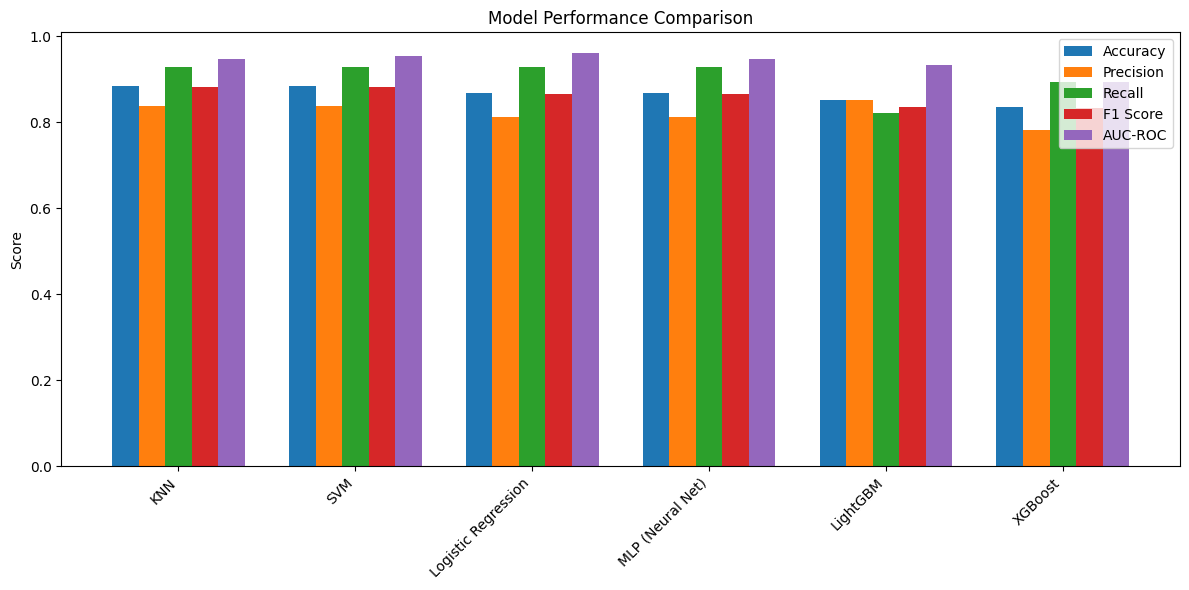

In [ ]:


# final visualization
metrics = ["Accuracy", "Precision", "Recall", "F1 Score", "AUC-ROC"]

x = np.arange(len(results_df))  # Number of models
width = 0.15  # width of each bar

fig, ax = plt.subplots(figsize=(12, 6))

for i, metric in enumerate(metrics):
    ax.bar(x + i*width, results_df[metric], width, label=metric)

ax.set_xticks(x + width * 2)
ax.set_xticklabels(results_df.index, rotation=45, ha='right')
ax.set_ylabel('Score')
ax.set_title('Model Performance Comparison')
ax.legend()

plt.tight_layout()
plt.show()


In [ ]:
# Optional: Generate download link in Colab
import base64
from IPython.display import HTML

def create_download_link(filename):
    with open(filename, "rb") as f:
        data = f.read()
    b64 = base64.b64encode(data).decode()
    return HTML(f'<a download="{filename}" href="data:text/csv;base64,{b64}">📥 Download {filename}</a>')

create_download_link("final_model_results.csv")